KNN: classificação - aprendizado supervisionado - considera a proximidade entre dados, permitindo realizar predições (classificação Sim ou Não, etc.) ou predição do tipo regressão com o KNNR. Considera que dados similares tendem a estar concentrados na mesma região do espaço quando submetidos à dispersão.
Funciona bem para classes linearmente separáveis, também para não lineares, mas para estas últimas uma rede neural é melhor. Normalmente o K é ímpar para evitar 'dúvida' na classificação, algo como [9,11] mas pode-se ir testando a partir de 1 checando a acurácia

Baseado em medidas no espaço cartesiano entre os pontos:
- Euclidiana
- Manhattan
- Minkowski: generalização entre Euclidiana (p = 2) e Manhattan (p = 1). No sklearn tem que setar o p, pois usa Minkowski
- Jaccard

KNN calcula distância para todos os objetos. Pode ter problema de desempenho a depender do tamanho do dataset e features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


Iris Flower DATASET: https://www.kaggle.com/arshid/iris-flower-dataset

In [2]:
df = pd.read_csv('datasets/iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [23]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'target'],
      dtype='object')

In [24]:
df.describe(include=object) # include='all'

,target
count,150
unique,3
top,Iris-setosa
freq,50


Mudando o nome da coluna species para target

In [25]:
df.rename(columns={'Species': 'target'}, inplace=True) # inplace = True não cria novo dataframe, altera o atual - case sensitive
db = df.copy() # mantenho db como cópia de df completo
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


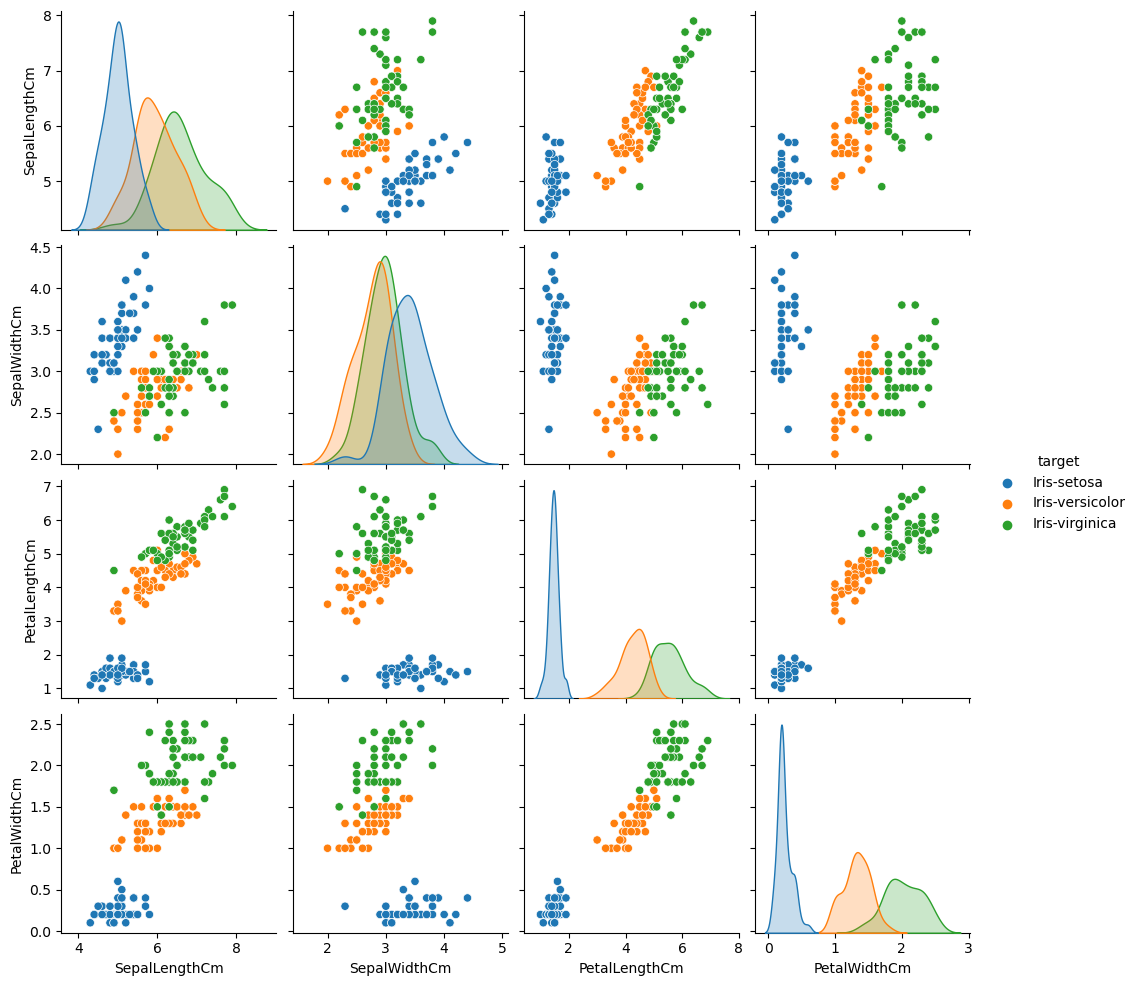

In [26]:
sb.pairplot(db, hue='target') # dispersão entre as colunas de dados, sem a coluna de classificação SPECIES:target

Remover do dataframe a coluna target, pois já contém a classificação. A ideia é rodar o knn para ele fazer a classificação e comparar com a classificação já existente. Vamos criar um array para as features X

In [27]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

db['target_encoded'] = encoder.fit_transform(db['target'])

print(encoder.classes_)



['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [48]:
X = np.array(db.drop(columns=['target','target_encoded','PetalWidthCm','PetalLengthCm'], axis=1)) # cria array numpy a partir do dataframe, removendo a coluna 'target'. axis = 1 informa que target é coluna e não linha

In [44]:
X #features

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Separar as classes do dataframe, criando um array:

In [30]:
y = np.array(db['target_encoded']) #coluna alvo (exemplos)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Importar KNN, da lib scikt-Learn

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dividir conjuntos de treino e teste. O random_state é comum em ML, para permitir, se desejável na fase de testes, a reprodutibilidade dos resultados, ao setar uma semente fixa. Se deixar vazio, a cada RUN, o resultado varia.

In [49]:
# treino com 70%, valida com 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30) 
knn.fit(X_train, y_train) # Treino com todas as features !!!

KNeighborsClassifier(n_neighbors=3)

In [54]:
s = y_test.size
y_knn = []
for i in range(s):
    y_knn.append(knn.predict([X_test[i,:]])) # vetor contendo as features
print(y_knn)
print('Medindo a acurácia do KNN (%): {}'.format(accuracy_score(y_test, y_knn, normalize=True)*100)) #normalize=True, fração dos corretos

[array([0]), array([0]), array([0]), array([2]), array([2]), array([1]), array([2]), array([1]), array([2]), array([2]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([2]), array([1]), array([0]), array([0]), array([0]), array([2]), array([1]), array([1]), array([2]), array([0]), array([2]), array([1]), array([1]), array([1]), array([1]), array([2]), array([1]), array([1]), array([2]), array([1]), array([2]), array([2]), array([1]), array([0]), array([2]), array([2])]
Medindo a acurácia do KNN (%): 68.88888888888889


In [53]:
confusion_matrix(y_test, y_knn)

array([[13,  0,  0],
       [ 0,  8,  5],
       [ 0,  9, 10]], dtype=int64)

In [57]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.47      0.62      0.53        13
           2       0.67      0.53      0.59        19

    accuracy                           0.69        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.69      0.69        45

